# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [2]:
! git clone https://github.com/DS3001/visualization

fatal: destination path 'visualization' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [4]:
df = pd.read_csv("/content/visualization/assignment/data/college_completion.csv")
print(df.shape)
#there are 63 columns (variables) and 3798 rows (observations)
df.head()

(3798, 63)


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


In [5]:
pd.crosstab(df['control'],df['level'])
pd.crosstab(df['control'],df['level'], normalize = 'all')
#most institutions are a private nonprofit 4-year institution (31%). The second most
#popular are public 2-year institutions (24%). Every other combination of institution
#is roughly at the same frequency (between 12% and 17%). 4 year institutions are more
#common than 2-year and public institutions are more common than private.

level,2-year,4-year
control,,
Private for-profit,0.122433,0.138757
Private not-for-profit,0.017904,0.310690
Public,0.243813,0.166403


<Axes: xlabel='grad_100_value', ylabel='Count'>

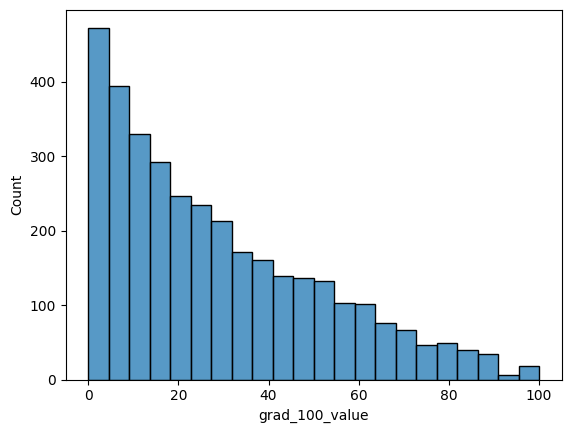

In [6]:
var = df["grad_100_value"]
sns.histplot(var)

<Axes: xlabel='grad_100_value', ylabel='Density'>

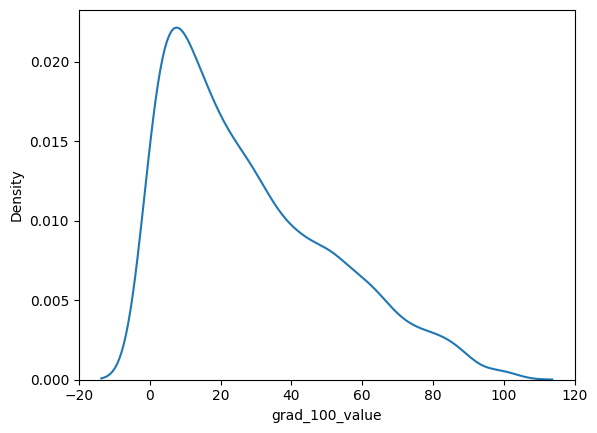

In [7]:
sns.kdeplot(var)

<Axes: ylabel='grad_100_value'>

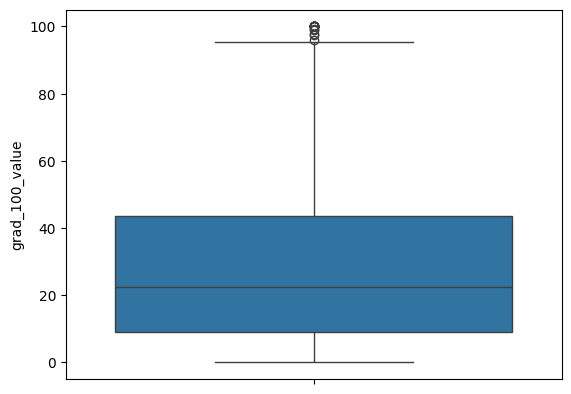

In [8]:
sns.boxplot(var)

In [9]:
var.describe()

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64

<Axes: xlabel='grad_100_value', ylabel='Density'>

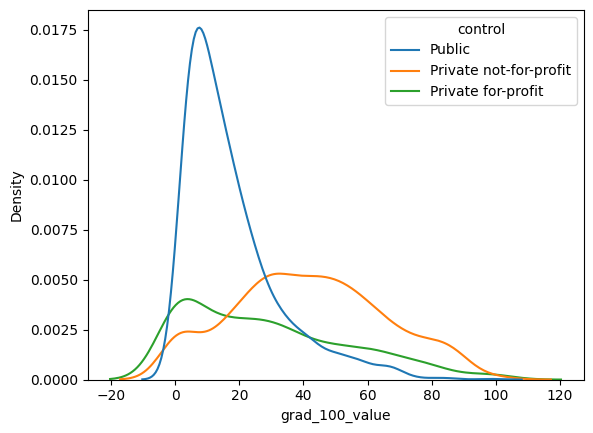

In [10]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

<Axes: xlabel='grad_100_value', ylabel='Density'>

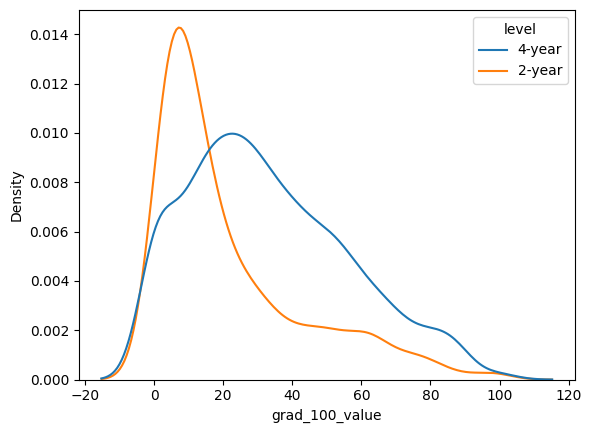

In [11]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

In [12]:
df.loc[:,['control','grad_100_value']].groupby('control').describe()
#private nonprofit grad rates are the highest of the 3 categories

grad_100_value                                          \
                                count       mean        std  min    25%   50%   
control                                                                         
Private for-profit              779.0  29.108858  25.601687  0.0   6.95  24.7   
Private not-for-profit         1189.0  41.660976  23.551231  0.0  25.00  41.0   
Public                         1499.0  17.430887  14.729443  0.0   6.90  13.2   

                                      
                          75%    max  
control                               
Private for-profit      46.75  100.0  
Private not-for-profit  58.30  100.0  
Public                  23.25   97.8

In [13]:
df.loc[:,['level','grad_100_value']].groupby('level').describe()
#4-year institution grad rates are the highest of the 2 categories

grad_100_value                                                      
                count       mean        std  min   25%   50%     75%    max
level                                                                      
2-year         1455.0  21.636151  21.645747  0.0   6.0  13.0  30.600  100.0
4-year         2012.0  33.230119  23.270160  0.0  15.2  29.7  49.225  100.0

<Axes: xlabel='grad_100_value', ylabel='Density'>

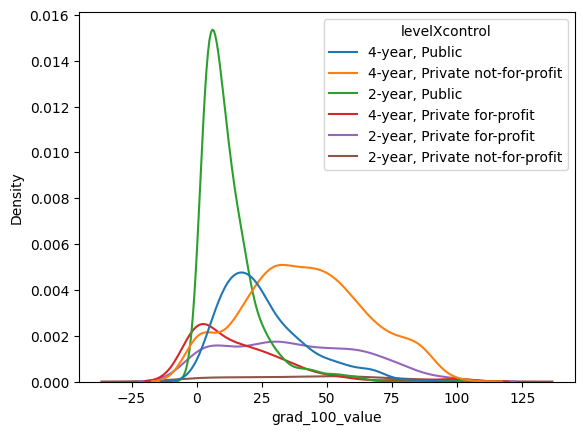

In [14]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

In [15]:
df.loc[:,['level','control','grad_100_value']].groupby(['level','control']).describe()
#Private for-profit 2-year graduation rates are nearly double those of 4-year programs,
#while public 2-year rates are notably lower. Despite assumptions, 2-year private for-profit
#programs perform relatively well in graduation rates.

grad_100_value                             \
                                       count       mean        std  min   
level  control                                                            
2-year Private for-profit              461.0  37.197614  25.497380  0.0   
       Private not-for-profit           68.0  41.913235  28.348302  0.0   
       Public                          926.0  12.400000  10.893600  0.0   
4-year Private for-profit              318.0  17.382704  20.788525  0.0   
       Private not-for-profit         1121.0  41.645674  23.243453  0.0   
       Public                          573.0  25.561082  16.403902  0.0   

                                                            
                                  25%   50%     75%    max  
level  control                                              
2-year Private for-profit      15.800  33.9  57.800  100.0  
       Private not-for-profit  16.225  44.4  61.200  100.0  
       Public                   5.100   9.4  16.175   97.8  
4-year Private for-profit       0.000  12.5  26.325  100.0  
       Private not-for-profit  25.000  41.0  57.800  100.0  
       Public                  13.600  21.8  33.800   86.3

<Axes: xlabel='aid_value', ylabel='Density'>

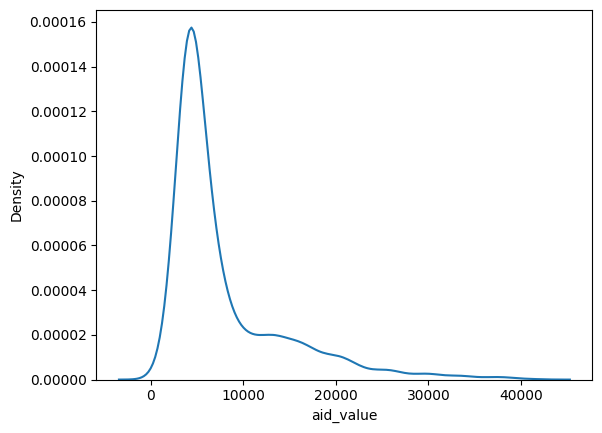

In [16]:
sns.kdeplot(data=df,x='aid_value') #slight increase in density around 11,000

<Axes: xlabel='aid_value', ylabel='Density'>

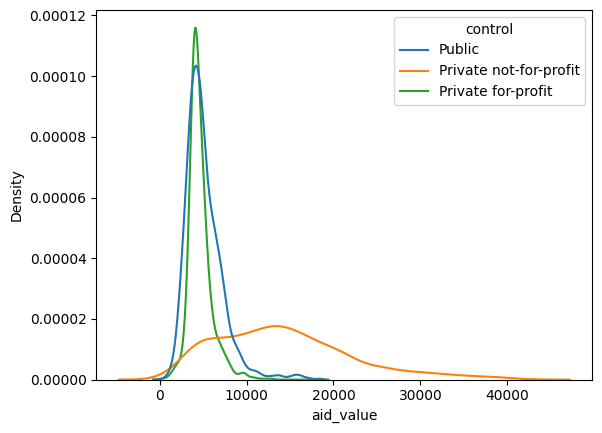

In [17]:
sns.kdeplot(data=df,x='aid_value',hue='control')

<Axes: xlabel='aid_value', ylabel='Density'>

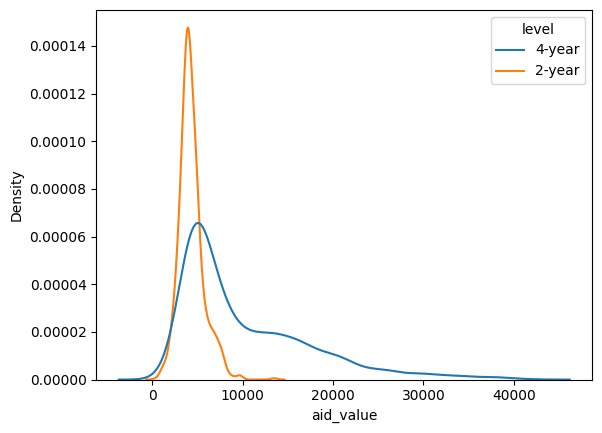

In [18]:
sns.kdeplot(data=df,x='aid_value',hue='level')

In [19]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [20]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

In [21]:
# The second peak represents private not-for-profit institutions,
# while the peak around 9 corresponds to public and private for-profit institutions.
# Private not-for-profit institutions provide more aid compared to public and
#private for-profit institutions, despite including both types of institutions.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

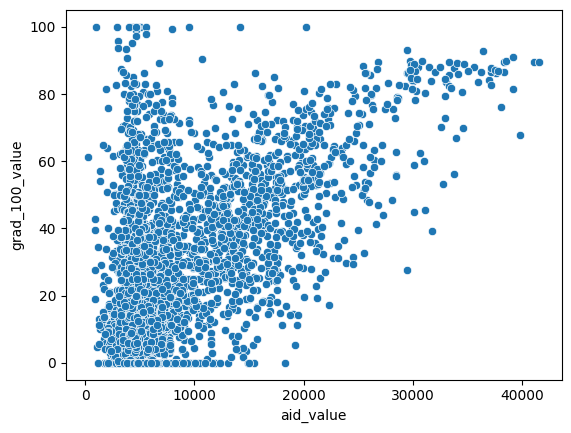

In [22]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')
#2 trends: one with a positive correlation between variables and
#one with increasing grad value and constant aid value

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

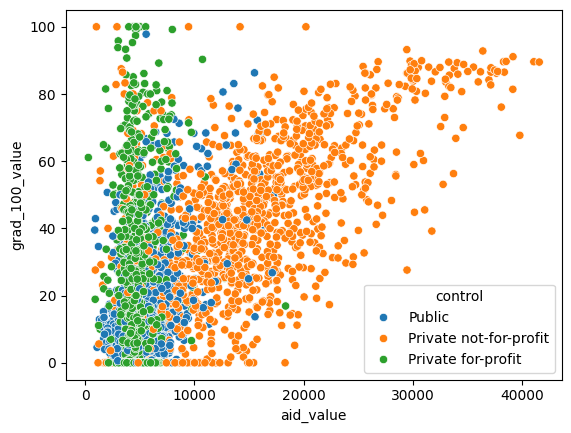

In [23]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

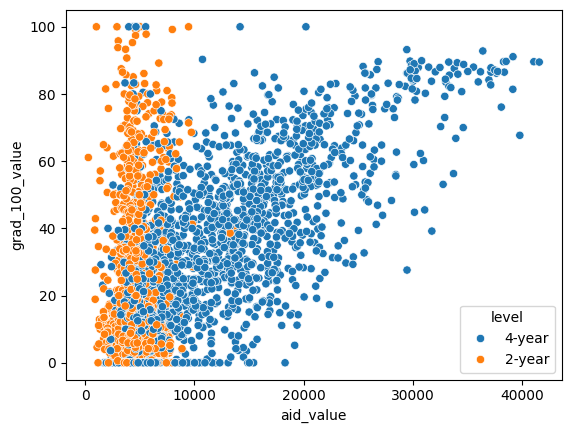

In [24]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

In [25]:
#The positive association is mainly observed in 4-year private not-for-profit institutions,
# where aid_value and grad_100_value rise together. Other groups offer lower aid amounts,
#with fluctuating graduation rates, possibly due to
#competitive recruiting or a causal effect between aid and graduation rates.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

In [26]:
dictionary = "https://data.cms.gov/resources/specific-chronic-conditions-data-dictionary"
df2 = pd.read_csv("/content/CC_R20_P08_v10_D18_WWDSE_Cond.csv", low_memory = False)
df2.head()
#Specific chronic conditions documented in 2018
#dictionary doesn't document how missings are handled except for Bene_Geo_Cd
#There are possible values listed for categorical variables
#there are no missing value codes listed
#I think the dictionary is decent, the values that the variables are measured in
#are explained pretty well but there's nothing really describing missing values

,Bene_Geo_Lvl,Bene_Geo_Desc,Bene_Geo_Cd,Bene_Age_Lvl,Bene_Demo_Lvl,Bene_Demo_Desc,Bene_Cond,Prvlnc,Tot_Mdcr_Stdzd_Pymt_PC,Tot_Mdcr_Pymt_PC,Hosp_Readmsn_Rate,ER_Visits_Per_1000_Benes
0,State,Alabama,1.0,All,All,All,Alcohol Abuse,0.0188,25102.3405,23348.6039,0.2413,2184.7557
1,State,Alabama,1.0,65+,Dual Status,Medicare Only,Alcohol Abuse,0.0118,NaN,NaN,NaN,NaN
2,State,Alabama,1.0,<65,Dual Status,Medicare Only,Alcohol Abuse,0.0320,NaN,NaN,NaN,NaN
3,State,Alabama,1.0,All,Dual Status,Medicare Only,Alcohol Abuse,0.0147,NaN,NaN,NaN,NaN
4,State,Alabama,1.0,65+,Dual Status,Medicare and Medicaid,Alcohol Abuse,0.0238,NaN,NaN,NaN,NaN


In [27]:
BC = df2["Bene_Cond"] #Identifies the chronic condition for which the prevalence and utilization is compiled
BAL = df2["Bene_Age_Lvl"] #Identifies the age level of the population that the data has been aggregated.
PRV = df2["Prvlnc"] #Prevalence estimates are calculated by taking the beneficiaries with a particular condition
#divided by the total number of beneficiaries in our fee-for-service population, expressed as a percentage.
#I think the condition, age level, and prevalence will all work well together in describing trends for this dataset

In [28]:
from itertools import count
print(BC.unique())
print(BC.value_counts())# I don't think this variable needs cleaning since all the values make sense and are unique
#I think it's super odd that all the chronic illnesses have the same counts... this is because the data set does something
#interesting: they made the data into essentially a multivariable multidimensional table where the condition is both a value dependent
# on region but also a variable that dictates the prevalence

['Alcohol Abuse' "Alzheimer's Disease/Dementia" 'Arthritis' 'Asthma'
 'Atrial Fibrillation' 'Autism Spectrum Disorders' 'COPD' 'Cancer'
 'Chronic Kidney Disease' 'Depression' 'Diabetes' 'Drug/Substance Abuse'
 'HIV/AIDS' 'Heart Failure' 'Hepatitis (Chronic Viral B & C)'
 'Hyperlipidemia' 'Hypertension' 'Ischemic Heart Disease' 'Osteoporosis'
 'Schizophrenia and Other Psychotic Disorders' 'Stroke']
Alcohol Abuse                                  11244
Drug/Substance Abuse                           11244
Schizophrenia and Other Psychotic Disorders    11244
Osteoporosis                                   11244
Ischemic Heart Disease                         11244
Hypertension                                   11244
Hyperlipidemia                                 11244
Hepatitis (Chronic Viral B & C)                11244
Heart Failure                                  11244
HIV/AIDS                                       11244
Diabetes                                       11244
Alzheimer's Dise

In [29]:
print(BAL.unique())
print(BAL.value_counts())
#no cleaning needed here for the same reason as previously stated

['All' '65+' '<65']
All    78708
65+    78708
<65    78708
Name: Bene_Age_Lvl, dtype: int64


In [30]:
print(PRV.unique())
print(PRV.value_counts())
print(df2.shape)
#the counts indicate that lower prevalences are more common which makes sense since
#prevalence essentially groups together observations where all variables are the same.
#Since a lot of different variables are being measured, although this dataset has over
#200k observations, it's less likely for all variable values to overlap for one observation
#than it is for all variable values to actually overlap.

[0.0188 0.0118 0.032  ... 0.6929 0.6726 0.5449]
0.0000    4150
0.0186     168
0.0031     168
0.0191     165
0.0219     163
          ... 
0.6771       1
0.6954       1
0.6906       1
0.6925       1
0.5449       1
Name: Prvlnc, Length: 7229, dtype: int64
(236124, 12)


<Axes: ylabel='Prvlnc'>

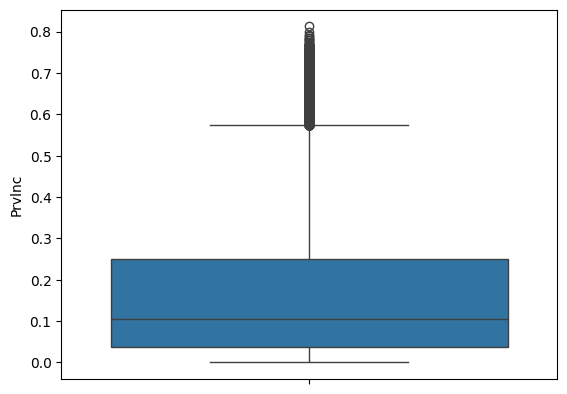

In [31]:
sns.boxplot(PRV) #this boxplot indicates that most observations are of low
#prevalence while a lot of individual outlier observations occur at prevalences of
#0.6 to 0.8 (high prevalence)

<Axes: ylabel='Bene_Cond'>

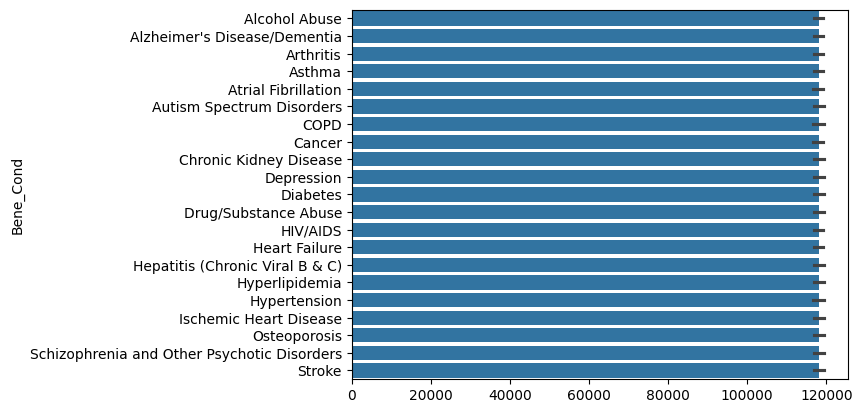

In [32]:
sns.barplot(BC)

<Axes: ylabel='Bene_Age_Lvl'>

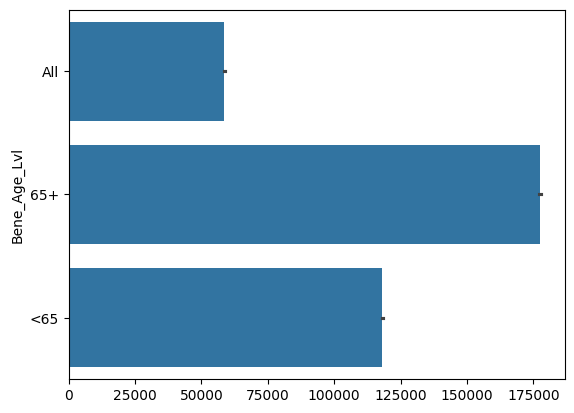

In [33]:
sns.barplot(BAL)

<Axes: xlabel='Bene_Cond', ylabel='Count'>

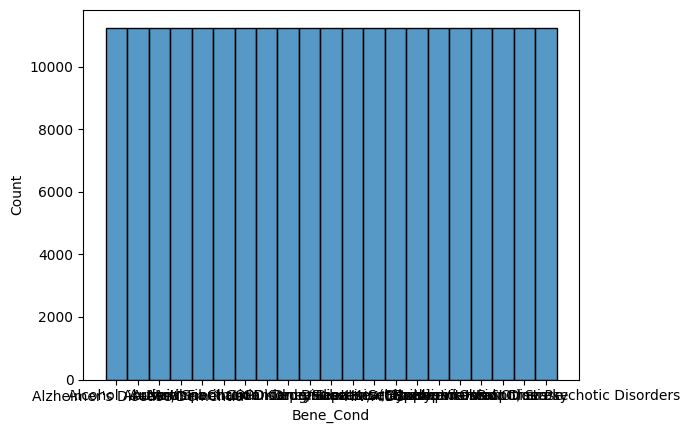

In [40]:
sns.histplot(data=df2, x="Bene_Cond")
#As I previously observed, the Bene_cond variable is more like a variable of variables,
#with each sub-variable containing the same amount of observations in order to superimpose
#all the variables onto each other to see which sub-variables overlap. This overlap in
#sub-variables is what creates the prevalence variable (the only variable on the
#dataset that isn't a variable of variables)

<Axes: xlabel='Bene_Age_Lvl', ylabel='Count'>

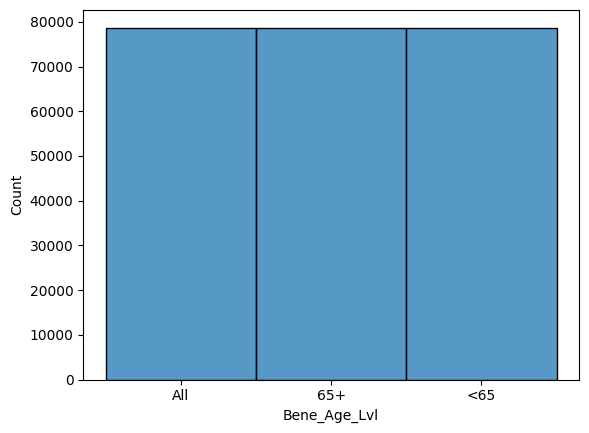

In [38]:
sns.histplot(data=df2, x="Bene_Age_Lvl") #the previous trend I mentioned above is also
#observed with the Bene_Age_Lvl variable

<Axes: xlabel='Prvlnc', ylabel='Count'>

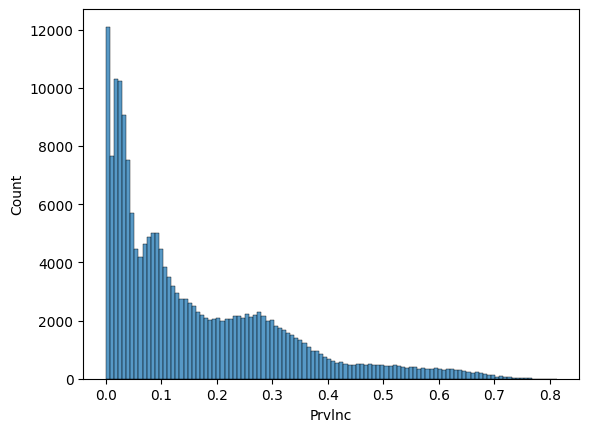

In [39]:
sns.histplot(data=df2, x="Prvlnc") #See how this is the only variable with a histogram
#that resembles something remotely useful? Now we can superimpose (group) the previous two variables
#with this one to draw meaningful conclusions!

<Axes: xlabel='Prvlnc', ylabel='Count'>

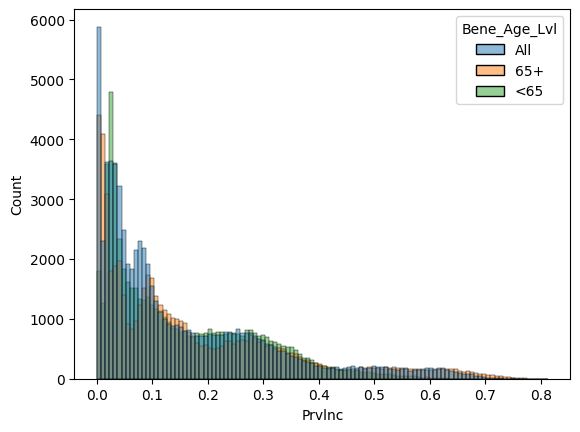

In [41]:
sns.histplot(data=df2, x="Prvlnc", hue="Bene_Age_Lvl")
#Since A value of 'All' indicates the data in the row represents all Feefor-Service Medicare Beneficiaries and doesn't
#tell us much about the age ranges for the recipients, the
#important colors to look at are 65+ and <65. Looking at these categories, we can draw the following conclusions:
#In general, age groups <65 are less prevalent recipients of Medicare since they experience
# a higher count at lower prevalences(this is a reasonable conclusion
#to draw as younger people statistically are less likely to suffer from chronic illness)
#In general, age groups 65+ are very prevalent recipients of Medicare since they observe
#higher counts than <65 at higher prevalences(once again, this makes reasonable sense
#as chronic illness is observed in older populations moreso than younger populations)

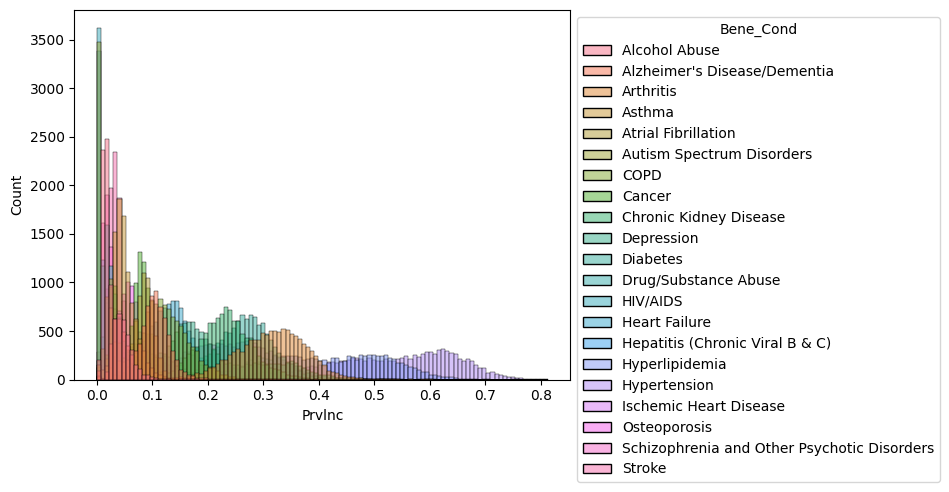

In [53]:
ax = sns.histplot(df2, x="Prvlnc", hue="Bene_Cond")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1)) #https://seaborn.pydata.org/generated/seaborn.move_legend.html
#While this plot is visually difficult to decipher, here are some general conclusions to draw:
#Alcohol abuse and drug/substance abuse are not very prevalent recipients of Medicare (this could be a reasonable
#conclusion to draw as it's likely difficult to qualify for Medicare for these reasons, and people in these substance
#abuse circumstances could be less likely to seek out these resources for various reasons (ex: denial of addiction))
#The most prevalent chronic illness seems to be hypertension (high blood pressure). This makes sense as nearly half of all
#adults have high blood pressure (~48% as reported by the CDC in 2023).

<Axes: xlabel='Prvlnc', ylabel='Tot_Mdcr_Pymt_PC'>

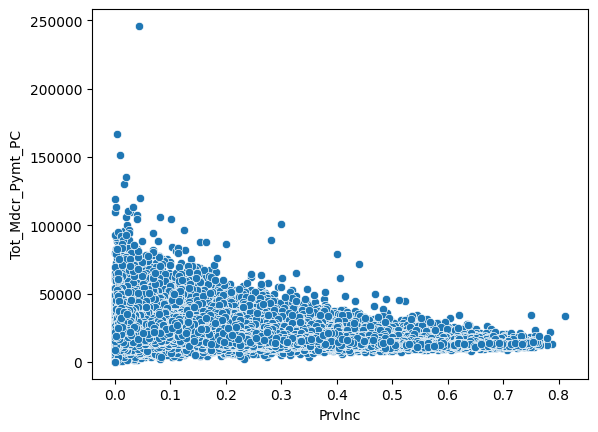

In [69]:
sns.scatterplot(data=df2,x='Prvlnc',y='Tot_Mdcr_Pymt_PC')
#Since two of the variables I initially explored were variables of variables (multidimensional),
# I decided to plot prevalence against Total Medicare Per Capita Spending (which I checked to
#ensure this variable didn't need cleaning)

#There is a slight negative correlation between prevalence and Medicare per Capita Spending,
#meaning that unique Medicare observations (hypothetical ex: 40 year old Substance Abuser) tend to pay
# more for Medicare than common (hypothetical ex: 70 year old that suffers from high blood pressure)
# Medicare observations. In my opinion this makes sense as more unique cases probably require
# individualized and non-standardized care, meaning more expensive care, meaning more expensive Medicare
# premiums. Generally, beneficiaries pay between $0 and $100,000.
# Of course, there are a few outliers to this trend.

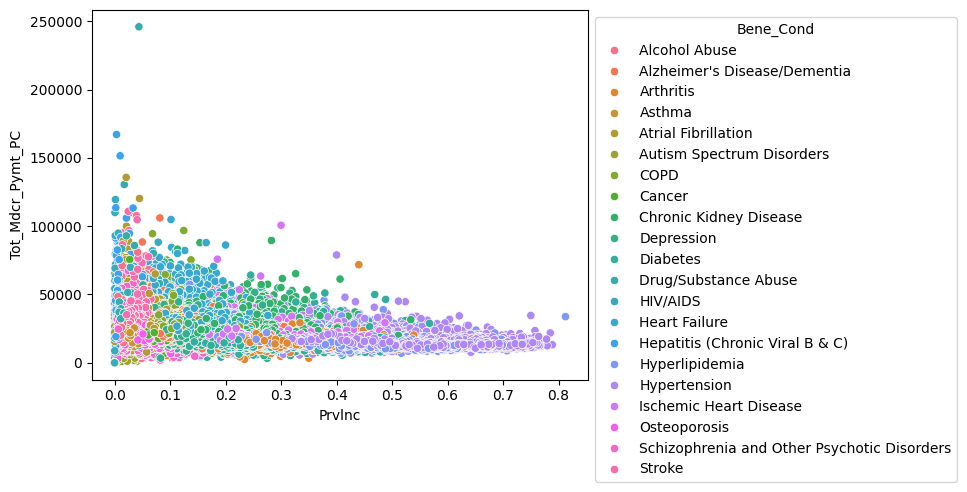

In [68]:
ax2 = sns.scatterplot(data=df2,x='Prvlnc',y='Tot_Mdcr_Pymt_PC', hue = "Bene_Cond")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
# Based on this data, it seems reasonable to correlate high Medicare costs to chronic illnesses such
# stroke, HIV/AIDS, and drug abuse. Lower costs correlate to illnesses like Hypertension and Arthritis.
# While these could be good conclusions to draw, the dictionary explicitly states, "The information should not be used to
# attribute utilization or payments strictly to the specific condition selected, as beneficiaries with any of the specific
# conditions presented may have other health conditions that contribute to their Medicare utilization and spending
# amounts."
# Due to this I won't expand on my thoughts about this plot since there could be a lot of information contributing
# to the shape of the graph that's not explained or mentioned.

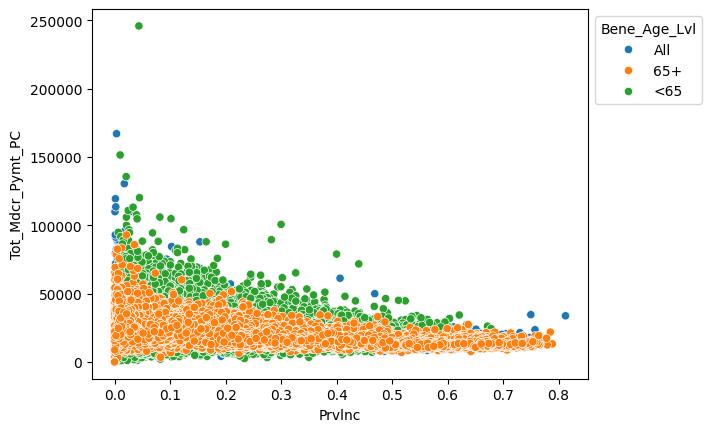

In [70]:
ax2 = sns.scatterplot(data=df2,x='Prvlnc',y='Tot_Mdcr_Pymt_PC', hue = "Bene_Age_Lvl")
sns.move_legend(ax2, "upper left", bbox_to_anchor=(1, 1))
# Interesting! Age groups <65 seem to pay higher premiums than 65+ at all
#prevalences except 0.7 to 0.8. This could be due to the fact that the most
# prevalent cases are 65+. There's probably a valid reason why younger people pay
# more than older people, but I can't find a concrete reason online.

In [77]:
df2.loc[:,['Prvlnc','Bene_Cond']].groupby('Bene_Cond').describe()
#The most prevalent chronic illness is hypertension (mean Prvlnc ~53%), this aligns with previous analyses
#The least prevalent chronic illnesses are HIV/AIDS and Autism Spectrum Disorders (mean Prvlnc ~0.4%), this
#is new information which likely couldn't be visualized due to more prevalent disorders crowding up plots

Prvlnc                           \
                                               count      mean       std  min   
Bene_Cond                                                                       
Alcohol Abuse                                 9106.0  0.027977  0.019609  0.0   
Alzheimer's Disease/Dementia                  9326.0  0.088687  0.041104  0.0   
Arthritis                                    10749.0  0.314497  0.064158  0.0   
Asthma                                        9667.0  0.050321  0.019344  0.0   
Atrial Fibrillation                           8680.0  0.066444  0.032322  0.0   
Autism Spectrum Disorders                     4204.0  0.004323  0.007606  0.0   
COPD                                         10358.0  0.127218  0.041036  0.0   
Cancer                                        9017.0  0.064654  0.026861  0.0   
Chronic Kidney Disease                       10643.0  0.231451  0.050969  0.0   
Depression                                   10754.0  0.215796  0.084837  0.0   
Diabetes                                     10722.0  0.271377  0.056248  0.0   
Drug/Substance Abuse                          9699.0  0.056563  0.048101  0.0   
HIV/AIDS                                      4493.0  0.004860  0.009553  0.0   
Heart Failure                                10271.0  0.134005  0.039791  0.0   
Hepatitis (Chronic Viral B & C)               6296.0  0.010560  0.009335  0.0   
Hyperlipidemia                               10714.0  0.402659  0.115185  0.0   
Hypertension                                 10832.0  0.526623  0.118467  0.0   
Ischemic Heart Disease                       10540.0  0.240137  0.074303  0.0   
Osteoporosis                                  8342.0  0.049426  0.024103  0.0   
Schizophrenia and Other Psychotic Disorders   9575.0  0.043735  0.037611  0.0   
Stroke                                        8549.0  0.033368  0.011092  0.0   

                                                                                
                                                 25%     50%       75%     max  
Bene_Cond                                                                       
Alcohol Abuse                                0.01410  0.0201  0.039100  0.1814  
Alzheimer's Disease/Dementia                 0.05250  0.0946  0.114475  0.3915  
Arthritis                                    0.27320  0.3182  0.358400  0.6033  
Asthma                                       0.03680  0.0464  0.060400  0.1728  
Atrial Fibrillation                          0.02990  0.0767  0.092100  0.1767  
Autism Spectrum Disorders                    0.00000  0.0016  0.004000  0.1002  
COPD                                         0.09890  0.1228  0.152000  0.3230  
Cancer                                       0.03630  0.0721  0.085300  0.1478  
Chronic Kidney Disease                       0.20000  0.2310  0.261650  0.5337  
Depression                                   0.15420  0.1896  0.275400  0.5306  
Diabetes                                     0.23620  0.2705  0.303175  0.6057  
Drug/Substance Abuse                         0.01960  0.0355  0.090200  0.2679  
HIV/AIDS                                     0.00000  0.0015  0.004900  0.1379  
Heart Failure                                0.10695  0.1333  0.158000  0.3212  
Hepatitis (Chronic Viral B & C)              0.00400  0.0067  0.015725  0.0717  
Hyperlipidemia                               0.31810  0.4046  0.495275  0.8125  
Hypertension                                 0.44380  0.5419  0.620625  0.7992  
Ischemic Heart Disease                       0.18640  0.2411  0.292625  0.4929  
Osteoporosis                                 0.02890  0.0499  0.065600  0.1720  
Schizophrenia and Other Psychotic Disorders  0.01670  0.0273  0.066950  0.3387  
Stroke                                       0.02620  0.0332  0.040000  0.1093